In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

%matplotlib inline

In [2]:
model = KeyedVectors.load_word2vec_format('/media/discoD/embeddings/word2vec_skip/skip_s100.txt')

In [3]:
word_list = ['Homem', 'Mulher', 'Rei', 'Rainha', 'Maçã', 'Laranja']

In [4]:
def plot(model, word_list):

    words = []
    embeddings = []

    # for word in list(model.wv.vocab):
    for word in word_list:
        embeddings.append(model[word.lower()])
        words.append(word.lower())

    tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_2d = tsne_2d.fit_transform(embeddings)

    def tsne_plot_2d(label, embeddings, words=[]):
        plt.figure(figsize=(16, 9))
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, label=label)
        for i, word in enumerate(words):
            plt.annotate(word.lower(), xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=10)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()

    tsne_plot_2d('Visualização de Word Embeddings', embeddings_2d, words)

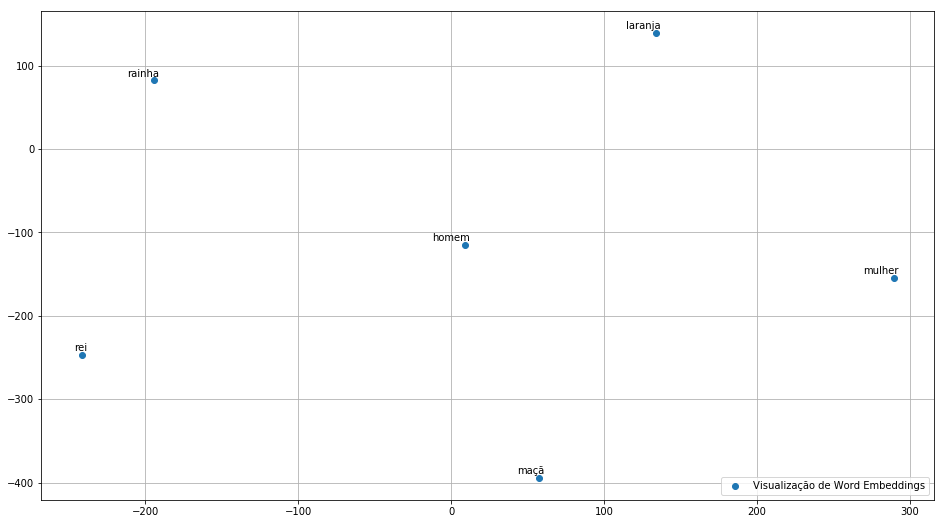

In [5]:
plot(model, word_list)

In [6]:
model.most_similar(positive=['rei', 'homem'], negative=['rainha'], topn=10)

[('demónio', 0.6855391263961792),
 ('intruso', 0.659054160118103),
 ('estereotipo', 0.6565697193145752),
 ('povo', 0.6493959426879883),
 ('vaticínio', 0.6420562267303467),
 ('salteador', 0.639818549156189),
 ('torcionário', 0.635098397731781),
 ('sanguinário', 0.635047197341919),
 ('facínora', 0.6344645619392395),
 ('fugitivo', 0.6343000531196594)]

In [7]:
model.most_similar(positive=['rei', 'homem'], negative=['mulher'], topn=10)

[('conquistador', 0.6959340572357178),
 ('monarca', 0.6842698454856873),
 ('tirano', 0.6654118299484253),
 ('usurpador', 0.6605169773101807),
 ('soberano', 0.6597871780395508),
 ('caudilho', 0.6527661085128784),
 ('antepassado', 0.6502918601036072),
 ('gépida', 0.6480100154876709),
 ('governante', 0.6479029655456543),
 ('sábio', 0.6425215005874634)]

In [8]:
model.most_similar(positive=['rainha', 'homem'], negative=['rei'], topn=10)

[('mulher', 0.6531288623809814),
 ('menina', 0.6371707916259766),
 ('rapariga', 0.6296486854553223),
 ('bruxa', 0.6230096220970154),
 ('moça', 0.6222633719444275),
 ('transexual', 0.6198751330375671),
 ('travesti', 0.6156657934188843),
 ('loira', 0.6112785339355469),
 ('criança', 0.6051071882247925),
 ('loura', 0.6048169732093811)]

In [9]:
model.most_similar(positive=['rei', 'mulher'], negative=['rainha'], topn=10)

[('parricida', 0.6153924465179443),
 ('professor.', 0.6031021475791931),
 ('pai', 0.6001143455505371),
 ('adúltero', 0.5956584215164185),
 ('enteado', 0.5953869819641113),
 ('concubina', 0.5945256352424622),
 ('helmiques', 0.593957781791687),
 ('cúmplice', 0.5923445820808411),
 ('clodérico', 0.5908956527709961),
 ('carcereiro', 0.5907853841781616)]

In [10]:
model_glove = KeyedVectors.load_word2vec_format('/media/discoD/embeddings/glove/glove_s100.txt')

In [11]:
model_glove.most_similar(positive=['rei', 'homem'], negative=['rainha'], topn=10)

[('morto', 0.6817996501922607),
 ('outro', 0.6672437787055969),
 ('próprio', 0.6613948941230774),
 ('criminoso', 0.6420975923538208),
 ('velho', 0.6343607306480408),
 ('ele', 0.6255717277526855),
 ('amigo', 0.6206011772155762),
 ('verdadeiro', 0.6161354780197144),
 ('pai', 0.6159656047821045),
 ('aquele', 0.6141542196273804)]

In [12]:
model_glove.most_similar(positive=['rei', 'mulher'], negative=['rainha'], topn=10)

[('homem', 0.8387821912765503),
 ('pai', 0.7724219560623169),
 ('marido', 0.7635302543640137),
 ('jovem', 0.7348281145095825),
 ('filho', 0.7216610908508301),
 ('irmão', 0.7166860103607178),
 ('morte', 0.713001012802124),
 ('rapaz', 0.7119288444519043),
 ('morto', 0.6929062604904175),
 ('vítima', 0.6879963278770447)]

In [13]:
model_glove.most_similar(positive=['rei', 'mulher'], negative=['homem'], topn=10)

[('rainha', 0.8619308471679688),
 ('princesa', 0.7710514068603516),
 ('esposa', 0.727602481842041),
 ('filha', 0.7210227251052856),
 ('isabel', 0.7201606035232544),
 ('consorte', 0.7145142555236816),
 ('irmã', 0.7085468769073486),
 ('príncipe', 0.7065805792808533),
 ('infanta', 0.6946784257888794),
 ('trono', 0.6820836067199707)]

In [14]:
model_glove.most_similar(positive=['rainha', 'homem'], negative=['rei'], topn=10)

[('mulher', 0.8624049425125122),
 ('menina', 0.7484058141708374),
 ('garota', 0.7352800369262695),
 ('criança', 0.7176203727722168),
 ('ela', 0.6958951950073242),
 ('rapaz', 0.6932846307754517),
 ('mãe', 0.6931593418121338),
 ('rapariga', 0.6819753050804138),
 ('jovem', 0.6725677251815796),
 ('amiga', 0.6661267280578613)]

In [15]:
model_glove.most_similar(positive=['moça', 'irmão'], negative=['rapaz'], topn=10)

[('filha', 0.7711759805679321),
 ('irmã', 0.7552363276481628),
 ('esposa', 0.7382581233978271),
 ('viúva', 0.7201449871063232),
 ('filho', 0.7190539836883545),
 ('sobrinha', 0.710273027420044),
 ('pai', 0.6981918811798096),
 ('mãe', 0.6899541616439819),
 ('avô', 0.6852066516876221),
 ('marido', 0.6799922585487366)]

In [16]:
model_glove.most_similar(positive=['moça', 'rei'], negative=['rapaz'], topn=10)

[('rainha', 0.7135931253433228),
 ('consorte', 0.6685947775840759),
 ('monarca', 0.6569160223007202),
 ('coroa', 0.643356442451477),
 ('imperador', 0.6411739587783813),
 ('princesa', 0.6382791996002197),
 ('herdeira', 0.623744010925293),
 ('príncipe', 0.6106195449829102),
 ('abdicação', 0.6089146137237549),
 ('majestade', 0.6071006655693054)]

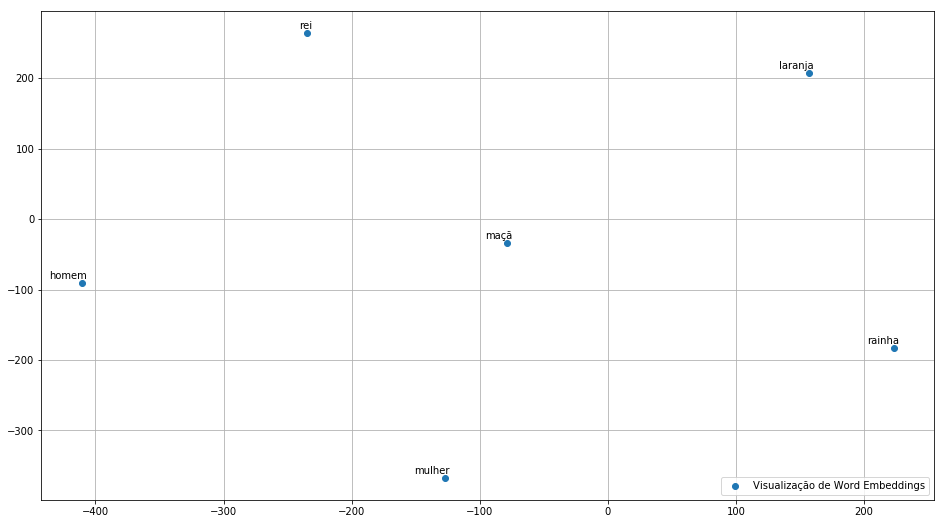

In [17]:
plot(model_glove, word_list)

In [18]:
model_jur = KeyedVectors.load_word2vec_format('/media/discoD/embeddings/glove-lc_jur/s100_jur2vec-nilc-brwac_win-15-8.txt')

FileNotFoundError: [Errno 2] No such file or directory: '/media/discoD/embeddings/glove-lc_jur/s100_jur2vec-nilc-brwac_win-15-8.txt'

In [ ]:
plot(model_jur, word_list)

In [ ]:
model_jur.most_similar(positive=['rei', 'mulher'], negative=['rainha'], topn=10)

In [ ]:
model_jur.most_similar(positive=['rei', 'mulher'], negative=['homem'], topn=10)

In [ ]:
model_jur.most_similar(positive=['réu', 'reclamante'], negative=['autor'], topn=10)

In [ ]:
model_jur_lg = KeyedVectors.load_word2vec_format('/media/discoD/embeddings/glove-lc_jur/s300_jur2vec-nilc-brwac_win-15-7.txt')

In [ ]:
model_jur_lg.most_similar(positive=['rei', 'mulher'], negative=['rainha'], topn=10)

In [ ]:
model_jur_lg.most_similar(positive=['rei', 'mulher'], negative=['homem'], topn=10)

In [ ]:
model_jur_lg.most_similar(positive=['réu', 'reclamante'], negative=['autor'], topn=10)